### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Dataset

In [2]:
train_df = pd.read_csv("Social_Network_Ads.csv")
X = train_df.iloc[ : , 1:4]
y = train_df.iloc[ :, 4]

### Describing data

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [4]:
train_df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
train_df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
train_df.describe(include='O')

,Gender
count,400
unique,2
top,Female
freq,204


### Finding missing data

In [7]:
X.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
dtype: int64

### Statistics

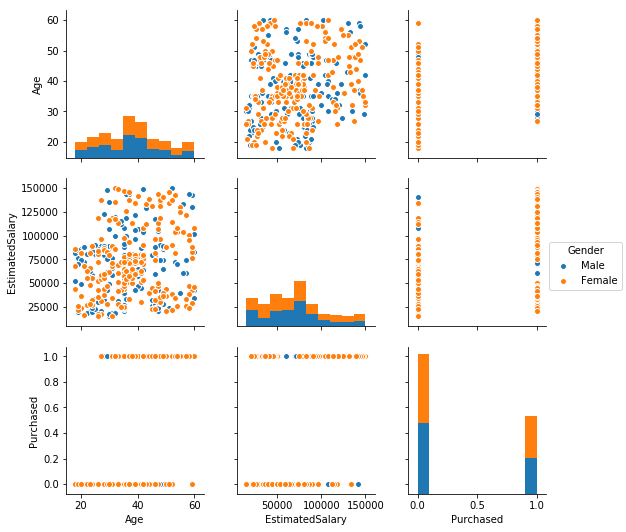

In [8]:
sns.pairplot(train_df.drop(columns=['User ID']), hue='Gender')

In [10]:
# Analyze by pivoting features
train_df[['Gender', 'Purchased']].groupby(['Gender'], as_index=False).mean().sort_values(by='Purchased', ascending=False)

,Gender,Purchased
0,Female,0.377451
1,Male,0.336735


### Encoding categorical data

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_X = LabelEncoder()
X.iloc[:,0] = labelEncoder_X.fit_transform(X.iloc[:,0])

### Splitting dataset into Train and test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
X_train.head()

,Gender,Age,EstimatedSalary
336,1,58,144000
64,0,59,83000
55,0,24,55000
106,0,26,35000
300,0,58,38000


### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.fit_transform(X_test)

X_train = pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)

In [15]:
X_train.head()

,0,1,2
0,1.025320,1.922950,2.146016
1,-0.975305,2.020161,0.378719
2,-0.975305,-1.382215,-0.432499
3,-0.975305,-1.187794,-1.011940
4,-0.975305,1.922950,-0.925024


### Applying Logistic Regression 

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
#Predicting Test set results
y_pred = classifier.predict(X_test)

#### Making the confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
cm = confusion_matrix(y_test, y_pred)

In [31]:
cm

array([[52,  6],
       [ 3, 19]], dtype=int64)

In [32]:
accuracy_score(y_test, y_pred)

0.8875

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

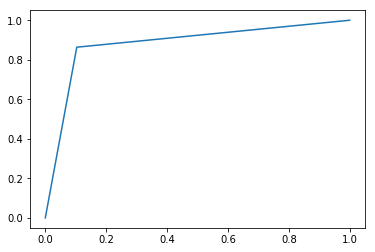

In [44]:
plt.plot(fpr, tpr)

In [48]:
roc_auc_score(y_test, y_pred)

0.8800940438871474

In [51]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
1,0.103448,0.863636,0.896552,-0.032915,1


[]

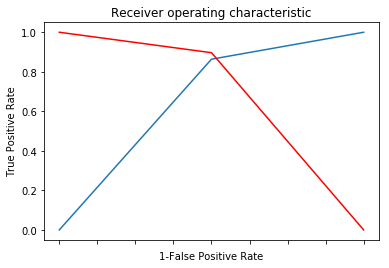

In [54]:
# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])